# IITB Techfest 2020 Data Analytics Workshop Assignment

In [1]:
# Install Required Modules
!pip install sklearn

In [2]:
# Module Imports
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams

In [3]:
# Read Data from canada_per_capita_income.csv
df = pd.read_csv('canada_per_capita_income.csv')
print(df)

    year  per_capita_income
0   1970        3399.299037
1   1971        3768.297935
2   1972        4251.175484
3   1973        4804.463248
4   1974        5576.514583
5   1975        5998.144346
6   1976        7062.131392
7   1977        7100.126170
8   1978        7247.967035
9   1979        7602.912681
10  1980        8355.968120
11  1981        9434.390652
12  1982        9619.438377
13  1983       10416.536590
14  1984       10790.328720
15  1985       11018.955850
16  1986       11482.891530
17  1987       12974.806620
18  1988       15080.283450
19  1989       16426.725480
20  1990       16838.673200
21  1991       17266.097690
22  1992       16412.083090
23  1993       15875.586730
24  1994       15755.820270
25  1995       16369.317250
26  1996       16699.826680
27  1997       17310.757750
28  1998       16622.671870
29  1999       17581.024140
30  2000       18987.382410
31  2001       18601.397240
32  2002       19232.175560
33  2003       22739.426280
34  2004       25719

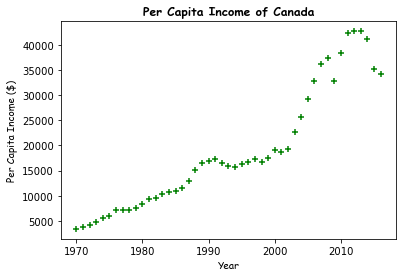

In [4]:
# Fonts to make graph look better
csbold = {'fontname':'Comic Sans MS' , 'fontweight': 'bold'}
csreg = {'fontname':'Comic Sans MS'}
# Show Datapoints on graph
%matplotlib inline
plt.xlabel('Year' , **csreg)
plt.ylabel('Per Capita Income ($)' , **csreg)
plt.title('Per Capita Income of Canada' , **csbold)
plt.scatter(df.year , df.per_capita_income , color='green' , marker='+')

In [5]:
old_years = df.drop('per_capita_income' , axis='columns')
old_pci = df.per_capita_income

In [6]:
# Create Linear Regression Object
reg = linear_model.LinearRegression()
reg.fit(old_years,old_pci)

LinearRegression()

**Test Prediction**
**$ x $** : 2020

In [7]:
x = 2020
print(x)
reg.predict([[x]])

2020


array([41288.69409442])

_Calculate Slope:_ $ m $

In [8]:
# Slope M (Coefficient)
m = reg.coef_
print(m)

[828.46507522]


_Calculate Intercept:_ **$ c $**

In [9]:
c = reg.intercept_
print(c)

-1632210.7578554575


_Calculate:_ **$ y $** <br>
_Equation:_ **$ y = mx + c $**

In [10]:
y = m*x + c
print(y)

[41288.69409442]


<h3>Generate CSV File with PCI Predictions</h3>

In [11]:
# Load years for which we want predictions
required_years = pd.read_csv('years.csv')
print(required_years)

    year
0   2030
1   2032
2   2056
3   2080
4   2090
5   2100
6   2105
7   2108
8   2116
9   2125
10  2129
11  2138
12  2205


In [12]:
# Run Linear Regression
predictions = reg.predict(required_years)
print(predictions)

[ 49573.34484664  51230.27499709  71113.43680244  90996.59860778
  99281.24936001 107565.90011223 111708.22548835 114193.62071402
 120821.3413158  128277.5269928  131591.38729369 139047.5729707
 194554.73301062]


In [13]:
predictions_df = required_years
predictions_df['predicted_per_capita_income'] = predictions

In [14]:
predictions_df.to_csv('predicted_pci.csv')